In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [15]:
iris_data = pd.read_table("./1649181792_01407_1604554690_4994035_1601384279_9602122_iris_new_data.txt", header=None, skip_blank_lines=False, delim_whitespace=True)


In [16]:
#k-mean implementation
from scipy.spatial.distance import cdist 
def kmeans_func(x, k, iter):
    idx = np.random.choice(len(x), k, replace=False)
    cent = x[idx, :] 
    dist = cdist(x, cent ,'cosine')
    pnts = np.array([np.argmin(i) for i in dist]) 
    for _ in range(iter): 
        cent = []
        for idx in range(k):
            temp_cent = x[pnts==idx].mean(axis=0) 
            cent.append(temp_cent)
 
        cent = np.vstack(cent)
        dist = cdist(x, cent ,'cosine')
        pnts = np.array([np.argmin(i) for i in dist])
    return pnts, cent 

In [17]:
iris_cluster_labels = kmeans_func(iris_data.values,3,75)
print(iris_cluster_labels[0])
np.savetxt("irisOutData.txt",iris_cluster_labels[0],fmt="%s") 

[0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0 2
 2 2 1 0 0 2 2 2 2 2 2 1 1 0 0 0 0 0 2 2 2 2 1 1 1 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 1 2 2 1 2 2 1 1 1 1 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 2 1
 1 1]


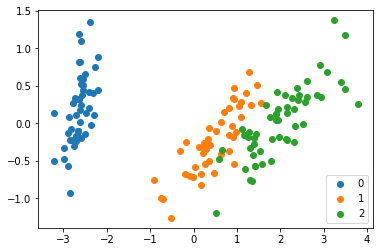

In [18]:
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(iris_data)
unique_points = np.unique(iris_cluster_labels[0])
for i in unique_points:
    plt.scatter(df[iris_cluster_labels[0] == i , 0] , df[iris_cluster_labels[0] == i , 1] , label = i)
plt.legend()
plt.show()

In [19]:
digit_image_data = pd.read_csv("./1649182019_5350096_1604556007_243332_1601384482_8387134_image_new_test.txt",header=None, delimiter=",")

In [20]:
digit_img_cluster_labels = kmeans_func(digit_image_data.values,10,75)


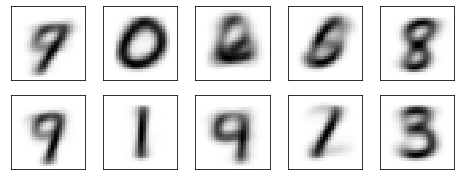

In [21]:
figure, ax = plt.subplots(2, 5, figsize=(8, 3))
centers =digit_img_cluster_labels[1].reshape(10,28,28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

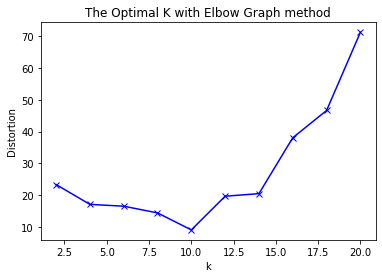

In [22]:
#Elbow graph implementation to find out optimal k

def sum_sqrd_erros(y , z):
  sum = 0 
  n = len(y)
  for i in range (1,n):
    diff = y[i] - z[i] 
    sqrd_diff = diff**2  
    sum = sum + sqrd_diff  
  return sum/n  

distrtn = []

K = [2,4,6,8,10,12,14,16,18,20]
y = kmeans_func(digit_image_data.values,10,50)    
for k in K:
    kmeanModelObserved = kmeans_func(digit_image_data.values,k,50)    
    model=kmeanModelObserved[0]
    distrtn.append(sum_sqrd_erros(y[0],model))


plt.figure()
plt.plot(K, distrtn, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Optimal K with Elbow Graph method')
plt.show()

In [23]:
#PCA AND t-SNE dimentionality reduction

pca = PCA(n_components=75)
pca_data = pca.fit_transform(digit_image_data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=8,verbose=1,n_iter=250)
tsne_pca_data = tsne.fit_transform(pca_data)

Explained variation per principal component: [0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041 0.02133899 0.02095204
 0.01725898 0.01685758 0.01576077 0.01494562 0.01302506 0.01278467
 0.01180118 0.011483   0.0106641  0.01027178 0.00979715 0.00901867
 0.00888231 0.00826573 0.00799743 0.00765838 0.00717514 0.00687256
 0.00649144 0.00627159 0.00590284 0.00581759 0.00544738 0.00541655
 0.00507243 0.00481121 0.00460166 0.00451523 0.00437027 0.00424364
 0.00412964 0.00389631 0.00378241 0.00370461 0.00358284 0.00331726
 0.00326815 0.00311842 0.00304071 0.00297838 0.00288486 0.00278701
 0.00273019 0.00262963 0.0025496  0.00253011 0.00244544 0.00241444
 0.00234353 0.00233251 0.00223063 0.00215497 0.00208805 0.00202254
 0.00199468 0.0018847  0.00187132 0.00185632 0.00180418 0.00173753
 0.0017034  0.00163821 0.00163475]
[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10000 samples in 2.955s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 352.348649
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.073288
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043567980705675258449965989174768031572607800285387605895586327668781715404589535143824

In [24]:
digit_clster_labels = kmeans_func(tsne_pca_data,10,150)
print((digit_clster_labels[0]))

[2 5 8 ... 8 6 3]


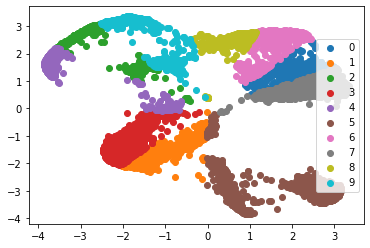

<Figure size 1440x1440 with 0 Axes>

In [25]:
unique_labels = np.unique(digit_clster_labels[0])
for i in unique_labels:
    plt.scatter(tsne_pca_data[digit_clster_labels[0] == i , 0] , tsne_pca_data[digit_clster_labels[0] == i , 1] , label = i)

plt.legend(loc='center right')
plt.figure(figsize=(20,20))
plt.show()

In [26]:
np.savetxt("digitoutputfile.txt",digit_clster_labels[0],fmt="%s")